In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [79]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [87]:
df = df.loc[df['sqft_lot']<40000]

In [80]:
check_col = ['price', 'sqft_lot']

In [81]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [83]:
df.reset_index(drop=True,inplace=True)

In [84]:
df.drop(all_indices,axis=0,inplace= True)

In [85]:
df['sqft_lot'].max()

137214

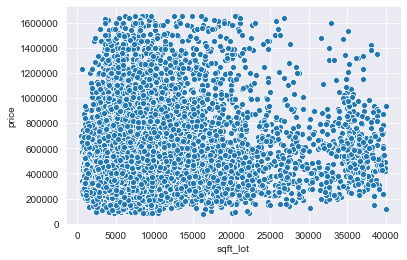

In [88]:
sns.scatterplot(x='sqft_lot',y='price',data=df)

In [89]:
df.shape

(17818, 19)

In [90]:
df = df.loc[df['condition']>=3]

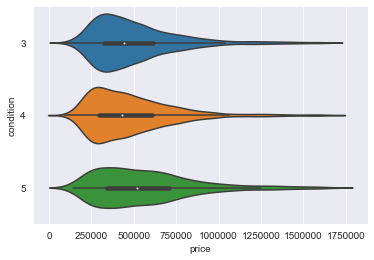

In [91]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [92]:
df = df.round({'bathrooms':0})

In [93]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

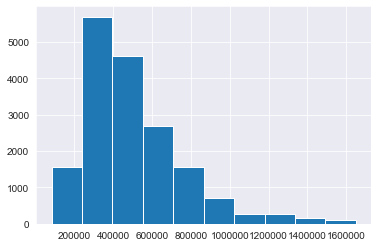

In [94]:
df['price'].hist()

In [95]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

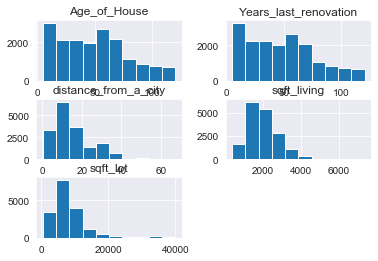

In [96]:
df[features].hist();

In [97]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [98]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


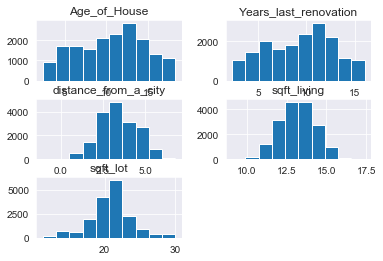

In [99]:
df[features].hist();

In [100]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [101]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [102]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [103]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']


In [104]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [105]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [106]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond3',
       'cond4', 'cond5', 'bedbath', 'livinglot'],
      dtype='object')

In [107]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [108]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'basement','grade']
outcome = ['price']

In [109]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [110]:
X = df[x_cols]
y = df['price']

In [111]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          3.863e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:00   Log-Likelihood:                     -2.3449e+05
No. Observations:               17670   AIC:                                  4.690e+05
Df Residuals:                   17663   BIC:                                  4.690e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.876e+04   1360.685    -13.786      0.000   -2.14e+04   -1.61e+04
bathrooms             1.432e+04   1458.861      9.815      0.000    1.15e+04    1.72e+04
sqft_living           1.058e+05   1676.288     63.102      0.000    1.02e+05    1.09e+05
sqft_lot              2.859e+04   1198.158     23.861      0.000    2.62e+04    3.09e+04
distance_from_a_city -1.335e+05   1143.118   -116.817      0.000   -1.36e+05   -1.31e+05
basement             -1.801e+04   2256.940     -7.981      0.000   -2.24e+04   -1.36e+04
grade                 6.737e+04    177.118    380.378      0.000     6.7e+04    6.77e+04
==============================================================================
Omnibus:                     4013.844   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13681.473
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       6.668   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.876e+04,1360.685,-13.786,0.0,-2.14e+04,-1.61e+04
bathrooms,1.432e+04,1458.861,9.815,0.0,1.15e+04,1.72e+04
sqft_living,1.058e+05,1676.288,63.102,0.0,1.02e+05,1.09e+05
sqft_lot,2.859e+04,1198.158,23.861,0.0,2.62e+04,3.09e+04
distance_from_a_city,-1.335e+05,1143.118,-116.817,0.0,-1.36e+05,-1.31e+05


In [113]:
X = df[x_cols]
y= df['price']

In [114]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          3.863e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:03   Log-Likelihood:                     -2.3449e+05
No. Observations:               17670   AIC:                                  4.690e+05
Df Residuals:                   17663   BIC:                                  4.690e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.876e+04   1360.685    -13.786      0.000   -2.14e+04   -1.61e+04
bathrooms             1.432e+04   1458.861      9.815      0.000    1.15e+04    1.72e+04
sqft_living           1.058e+05   1676.288     63.102      0.000    1.02e+05    1.09e+05
sqft_lot              2.859e+04   1198.158     23.861      0.000    2.62e+04    3.09e+04
distance_from_a_city -1.335e+05   1143.118   -116.817      0.000   -1.36e+05   -1.31e+05
basement             -1.801e+04   2256.940     -7.981      0.000   -2.24e+04   -1.36e+04
grade                 6.737e+04    177.118    380.378      0.000     6.7e+04    6.77e+04
==============================================================================
Omnibus:                     4013.844   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13681.473
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       6.668   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6615722882685617),
 ('bathrooms', 1.9099947768667036),
 ('sqft_living', 2.521746488970386),
 ('sqft_lot', 1.2883457521704529),
 ('distance_from_a_city', 1.17269876493649),
 ('basement', 1.7608585231151392),
 ('grade', 1.652778743528621)]

In [116]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

7 7


In [117]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          3.863e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:05   Log-Likelihood:                     -2.3449e+05
No. Observations:               17670   AIC:                                  4.690e+05
Df Residuals:                   17663   BIC:                                  4.690e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.876e+04   1360.685    -13.786      0.000   -2.14e+04   -1.61e+04
bathrooms             1.432e+04   1458.861      9.815      0.000    1.15e+04    1.72e+04
sqft_living           1.058e+05   1676.288     63.102      0.000    1.02e+05    1.09e+05
sqft_lot              2.859e+04   1198.158     23.861      0.000    2.62e+04    3.09e+04
distance_from_a_city -1.335e+05   1143.118   -116.817      0.000   -1.36e+05   -1.31e+05
basement             -1.801e+04   2256.940     -7.981      0.000   -2.24e+04   -1.36e+04
grade                 6.737e+04    177.118    380.378      0.000     6.7e+04    6.77e+04
==============================================================================
Omnibus:                     4013.844   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13681.473
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       6.668   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          3.863e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:06   Log-Likelihood:                     -2.3449e+05
No. Observations:               17670   AIC:                                  4.690e+05
Df Residuals:                   17663   BIC:                                  4.690e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.876e+04   1360.685    -13.786      0.000   -2.14e+04   -1.61e+04
bathrooms             1.432e+04   1458.861      9.815      0.000    1.15e+04    1.72e+04
sqft_living           1.058e+05   1676.288     63.102      0.000    1.02e+05    1.09e+05
sqft_lot              2.859e+04   1198.158     23.861      0.000    2.62e+04    3.09e+04
distance_from_a_city -1.335e+05   1143.118   -116.817      0.000   -1.36e+05   -1.31e+05
basement             -1.801e+04   2256.940     -7.981      0.000   -2.24e+04   -1.36e+04
grade                 6.737e+04    177.118    380.378      0.000     6.7e+04    6.77e+04
==============================================================================
Omnibus:                     4013.844   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13681.473
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       6.668   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

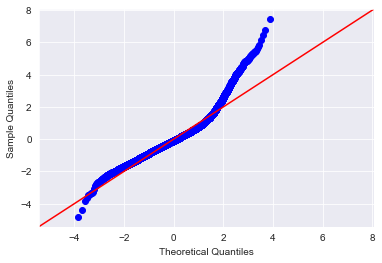

In [119]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


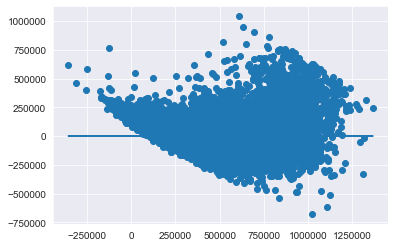

In [120]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

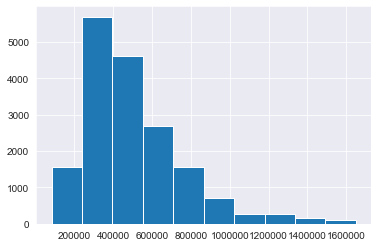

In [121]:
df.price.hist()

In [122]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 676180.8000000003
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 717000.0
0.84 percentile: 730000.0
0.85 percentile: 749000.0
0.86 percentile: 760000.0
0.87 percentile: 779000.0
0.88 percentile: 798000.0
0.89 percentile: 815000.0
0.9 percentile: 837021.9
0.91 percentile: 860000.0
0.92 percentile: 889974.0000000001
0.93 percentile: 921085.0000000009
0.94 percentile: 959986.0
0.95 percentile: 1000000.0
0.96 percentile: 1080000.0
0.97 percentile: 1190000.0
0.98 percentile: 1290000.0
0.99 percentile: 1423100.000000013


In [123]:
orig_tot = len(df)
df = df[df.price < 1200000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.02982456140350877


In [124]:
X = df[x_cols]
y = df['price']

In [125]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          4.743e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:17   Log-Likelihood:                     -2.2417e+05
No. Observations:               17143   AIC:                                  4.484e+05
Df Residuals:                   17136   BIC:                                  4.484e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.27e+04   1146.101    -11.082      0.000   -1.49e+04   -1.05e+04
bathrooms             5309.8336   1244.257      4.267      0.000    2870.962    7748.705
sqft_living           8.959e+04   1415.505     63.289      0.000    8.68e+04    9.24e+04
sqft_lot              2.122e+04   1007.356     21.067      0.000    1.92e+04    2.32e+04
distance_from_a_city -1.166e+05    972.593   -119.860      0.000   -1.18e+05   -1.15e+05
basement             -1.566e+04   1890.393     -8.284      0.000   -1.94e+04    -1.2e+04
grade                 6.523e+04    149.125    437.405      0.000    6.49e+04    6.55e+04
==============================================================================
Omnibus:                     1377.312   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2495.492
Skew:                           0.576   Prob(JB):                         0.00
Kurtosis:                       4.472   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.27e+04,1146.101,-11.082,0.0,-1.49e+04,-1.05e+04
bathrooms,5309.8336,1244.257,4.267,0.0,2870.962,7748.705
sqft_living,8.959e+04,1415.505,63.289,0.0,8.68e+04,9.24e+04
sqft_lot,2.122e+04,1007.356,21.067,0.0,1.92e+04,2.32e+04
distance_from_a_city,-1.166e+05,972.593,-119.860,0.0,-1.18e+05,-1.15e+05


In [127]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          4.743e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:19   Log-Likelihood:                     -2.2417e+05
No. Observations:               17143   AIC:                                  4.484e+05
Df Residuals:                   17136   BIC:                                  4.484e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.27e+04   1146.101    -11.082      0.000   -1.49e+04   -1.05e+04
bathrooms             5309.8336   1244.257      4.267      0.000    2870.962    7748.705
sqft_living           8.959e+04   1415.505     63.289      0.000    8.68e+04    9.24e+04
sqft_lot              2.122e+04   1007.356     21.067      0.000    1.92e+04    2.32e+04
distance_from_a_city -1.166e+05    972.593   -119.860      0.000   -1.18e+05   -1.15e+05
basement             -1.566e+04   1890.393     -8.284      0.000   -1.94e+04    -1.2e+04
grade                 6.523e+04    149.125    437.405      0.000    6.49e+04    6.55e+04
==============================================================================
Omnibus:                     1377.312   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2495.492
Skew:                           0.576   Prob(JB):                         0.00
Kurtosis:                       4.472   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6598130556451942),
 ('bathrooms', 1.840362938363778),
 ('sqft_living', 2.4178436844087403),
 ('sqft_lot', 1.2943016173478936),
 ('distance_from_a_city', 1.1887341947032208),
 ('basement', 1.7290146208412998),
 ('grade', 1.644658554075667)]

In [129]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

7 7


In [130]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          4.743e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:21   Log-Likelihood:                     -2.2417e+05
No. Observations:               17143   AIC:                                  4.484e+05
Df Residuals:                   17136   BIC:                                  4.484e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.27e+04   1146.101    -11.082      0.000   -1.49e+04   -1.05e+04
bathrooms             5309.8336   1244.257      4.267      0.000    2870.962    7748.705
sqft_living           8.959e+04   1415.505     63.289      0.000    8.68e+04    9.24e+04
sqft_lot              2.122e+04   1007.356     21.067      0.000    1.92e+04    2.32e+04
distance_from_a_city -1.166e+05    972.593   -119.860      0.000   -1.18e+05   -1.15e+05
basement             -1.566e+04   1890.393     -8.284      0.000   -1.94e+04    -1.2e+04
grade                 6.523e+04    149.125    437.405      0.000    6.49e+04    6.55e+04
==============================================================================
Omnibus:                     1377.312   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2495.492
Skew:                           0.576   Prob(JB):                         0.00
Kurtosis:                       4.472   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

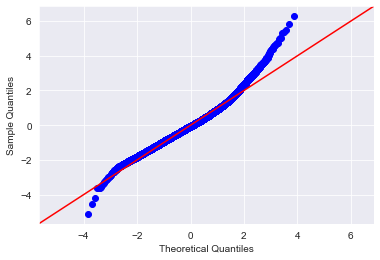

In [131]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


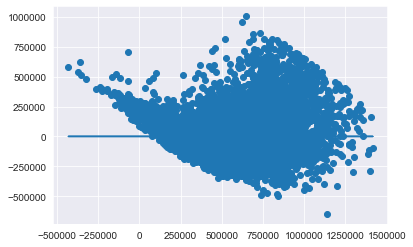

In [44]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 650000.0
0.81 percentile: 660000.0
0.82 percentile: 672887.9999999998
0.83 percentile: 685000.0
0.84 percentile: 699000.0
0.85 percentile: 710000.0
0.86 percentile: 724955.9999999999
0.87 percentile: 737269.9999999995
0.88 percentile: 750000.0
0.89 percentile: 765000.0
0.9 percentile: 782000.0
0.91 percentile: 800000.0
0.92 percentile: 820000.0
0.93 percentile: 840530.0000000006
0.94 percentile: 865000.0
0.95 percentile: 895000.0
0.96 percentile: 925000.0
0.97 percentile: 963732.599999998
0.98 percentile: 1000000.0
0.99 percentile: 1090000.0


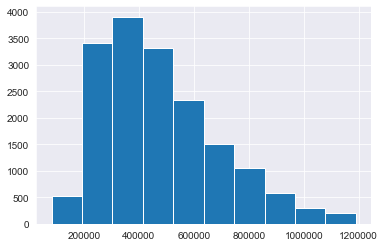

In [132]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [133]:
df = df[df.price <= 950000.0]


In [134]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          5.008e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:36   Log-Likelihood:                     -2.1530e+05
No. Observations:               16586   AIC:                                  4.306e+05
Df Residuals:                   16579   BIC:                                  4.307e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.065e+04   1063.296    -10.014      0.000   -1.27e+04   -8563.929
bathrooms              840.0871   1172.244      0.717      0.474   -1457.638    3137.812
sqft_living           8.085e+04   1320.119     61.247      0.000    7.83e+04    8.34e+04
sqft_lot              1.779e+04    933.920     19.045      0.000     1.6e+04    1.96e+04
distance_from_a_city -1.075e+05    909.970   -118.149      0.000   -1.09e+05   -1.06e+05
basement             -1.428e+04   1752.941     -8.149      0.000   -1.77e+04   -1.08e+04
grade                 6.378e+04    139.561    457.005      0.000    6.35e+04    6.41e+04
==============================================================================
Omnibus:                      555.415   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.998
Skew:                           0.359   Prob(JB):                    2.08e-166
Kurtosis:                       3.767   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 6
['bedrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city', 'basement']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.065e+04,1063.296,-10.014,0.000,-1.27e+04,-8563.929
bathrooms,840.0871,1172.244,0.717,0.474,-1457.638,3137.812
sqft_living,8.085e+04,1320.119,61.247,0.000,7.83e+04,8.34e+04
sqft_lot,1.779e+04,933.920,19.045,0.000,1.6e+04,1.96e+04
distance_from_a_city,-1.075e+05,909.970,-118.149,0.000,-1.09e+05,-1.06e+05


In [136]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          5.842e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:05:40   Log-Likelihood:                     -2.1530e+05
No. Observations:               16586   AIC:                                  4.306e+05
Df Residuals:                   16580   BIC:                                  4.307e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.056e+04   1055.648    -10.000      0.000   -1.26e+04   -8487.780
sqft_living           8.135e+04   1120.730     72.590      0.000    7.92e+04    8.36e+04
sqft_lot              1.763e+04    909.479     19.390      0.000    1.59e+04    1.94e+04
distance_from_a_city -1.075e+05    909.199   -118.220      0.000   -1.09e+05   -1.06e+05
basement             -1.419e+04   1747.987     -8.118      0.000   -1.76e+04   -1.08e+04
grade                 6.377e+04    139.254    457.963      0.000    6.35e+04     6.4e+04
==============================================================================
Omnibus:                      554.142   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              760.367
Skew:                           0.359   Prob(JB):                    7.73e-166
Kurtosis:                       3.765   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

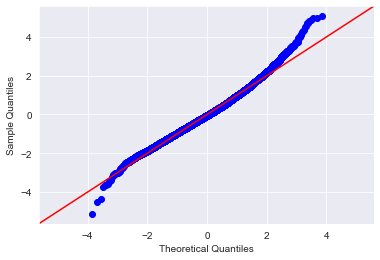

In [137]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


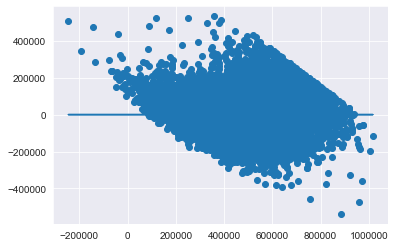

In [138]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [139]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [140]:
residuals = model.resid

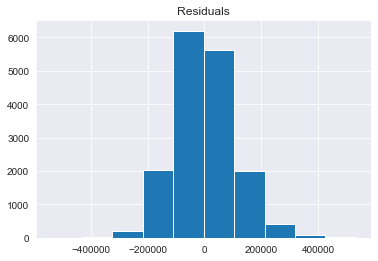

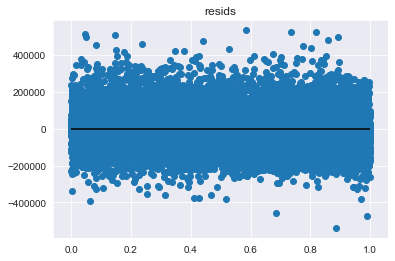

In [141]:
plot_residuals(residuals)

In [142]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [143]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [144]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6812434517340591, 0.6793381295785983, 0.6802993630699794)

In [145]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-81887.21905909813, -81922.71875785632, -81755.25244983177)

In [146]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.683871300891622

In [147]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [150]:
make_ols_sklearn(X, y)

train R2 score = 0.6857737720680024
test R2 score = 0.6795735048025798
cv5 R2 score = 0.6812434517340591
cv10 R2 score = 0.6793381295785983
cv5 MSE score = -11104999228.997234
cv10  MSE score = -11117882787.63469


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [151]:
make_ols_sklearn(X, y)

train R2 score = 0.6856920834406439
test R2 score = 0.6790728105850806
cv5 R2 score = 0.6812434517340591
cv10 R2 score = 0.6793381295785983
cv5 MSE score = -11104999228.997234
cv10  MSE score = -11117882787.63469


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [152]:
residuals = model.resid

In [153]:
resid = pd.DataFrame(df['price'])

In [154]:
resid['residuals']  = residuals

In [155]:
resid

,price,residuals
0,538000.0,33098.197725
1,180000.0,-39211.193631
2,604000.0,149192.415744
3,510000.0,-658.129932
5,257500.0,-4281.927382
...,...,...
19216,475000.0,-17145.940881
19217,360000.0,-108283.154128
19218,400000.0,-164963.656854
19219,402101.0,-100920.238495


In [156]:
import seaborn as sns

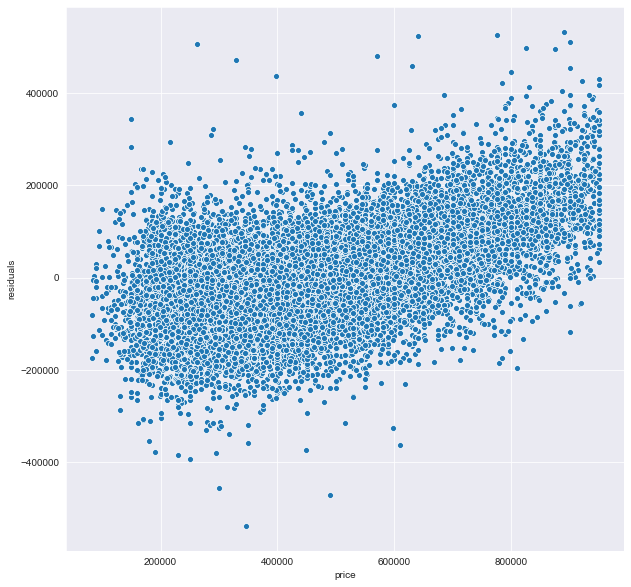

In [157]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [158]:
X_shuff, y_shuff = shuffle(X, y)

In [159]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6839117508004872

In [160]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6840042210267099

In [189]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white